# Tutorial 4: Effective Data Visualization 

### Lecture and Tutorial Learning Goals:

Expand your data visualization knowledge and tool set beyond what we have seen and practiced so far. We will move beyond scatter plots and learn other effective ways to visualize data, as well as some general rules of thumb to follow when creating visualizations. All visualization tasks this week will be applied to real world data sets. Remember, it is an iterative process to answer questions and each step taken should have a good reason behind it.  

After completing this week's lecture and tutorial work, you will be able to:

- Describe when to use the following kinds of visualizations:
    - scatter plots
    - line plots
    - bar plots
    - histogram plots
- Given a dataset and a question, select from the above plot types to create a visualization that best answers the question
- Given a visualization and a question, evaluate the effectiveness of the visualization and suggest improvements to better answer the question
- Identify rules of thumb for creating effective visualizations
- Define the three key aspects of ggplot objects:
    - aesthetic mappings
    - geometric objects
    - scales
- Use the `ggplot2` library in R to create and refine the above visualizations using:
    - geometric objects: `geom_point`, `geom_line`, `geom_histogram`, `geom_bar`, `geom_vline`, `geom_hline`
    - scales: `scale_x_continuous`, `scale_y_continuous`
    - aesthetic mappings: `x`, `y`, `fill`, `colour`, `shape`
    - labelling: `xlab`, `ylab`, `labs`
    - font control and legend positioning: `theme`
    - subplots: `facet_grid`
- Describe the difference in raster and vector output formats
- Use `ggsave` to save visualizations in `.png` and `.svg` format

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

This worksheet covers parts of [the Visualization chapter](https://datasciencebook.ca/viz.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [1]:
### Run this cell before continuing. 

library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




**Question 0.1** 
<br> {points: 1}

Match the following definitions with the corresponding aesthetic mapping or function used in R:

*Definitions*

A. Prevents a chart from being stacked. It preserves the vertical position of a plot while adjusting the horizontal position. 

B. In bar charts, this aesthetic fills in the bars by a specific colour or separates the counts by a variable different from the x-axis. 

C. In bar charts, it outlines the bars but in scatterplots, it fills in the points (colouring them based on a particular variable aside from the x/y-axis). 

D. This makes the height of each bar equal to the number of cases in each group, and it is incompatible with mapping values to the y aesthetic. This stat basically allows the y-axis to represent particular values from the data instead of just counts. 

E. This aesthetic allows further visualization of data by varying data points by shape (modifying their shape based on a particular variable aside from the x/y-axis).

F. Labels the y-axis. 


*Aesthetics and Functions*

1. `colour`
2. `dodge`
3. `fill`
4. `identity`
5. `ylab`
6. `shape`

For every description, create an object using the letter associated with the definition and assign it to the corresponding number from the list above. For example: `B <- 1`

In [2]:
# Replace the fail() with your answer. 

# your code here
A <- 2
B <- 3
C <- 1
D <- 4
E <- 6
F <- 5

In [3]:
test_0.1()

Test passed 🎊
[1] "Success!"


**Question 0.2** True or False:
<br> {points: 1}

We should save a plot as an `.svg` file if we want to be able to rescale it without losing quality.

*Assign your answer to an object called `answer0.2`. Make sure your answer is in lowercase letters and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [4]:
# Replace the fail() with your answer.
 
# your code here
answer0.2 <- "true"

In [5]:
test_0.2()

Test passed 🎉
[1] "Success!"


## 1. Data on Personal Medical Costs 

As we saw in the worksheet, data scientists work in all types of organizations and with all kinds of problems. One of these types of organizations are companies in the private sector that work with health data. Today we will be looking at data on personal medical costs. There are varying factors that affect health and consequently medical costs. Our goal for today is to determine how are variables related to the medical costs billed by health insurance companies. 


To analyze this, we will be looking at a dataset that includes the following columns:

* `age`: age of primary beneficiary
* `sex`: insurance contractor gender: female, male
* `bmi`: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/$m^{2}$) using the ratio of height to weight, ideally 18.5 to 24.9
* `children`: number of children covered by health insurance / number of dependents
* `smoker`: smoking
* `region`: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
* `charges`: individual medical costs billed by health insurance

*This dataset, was taken from the [collection of Data Sets](https://github.com/stedy/Machine-Learning-with-R-datasets) created and curated for the [Machine Learning with R](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) book by Brett Lantz.*

**Question 1.1** Yes or No: 
<br> {points: 1}

Based on the information given in the cell above, do you think the column `charges` includes quantitative/numerical data? 

*Assign your answer to an object called `answer1.1`. Make sure your answer is written in lowercase and is surrounded by quotation marks (e.g. `"yes"` or `"no"`).*

In [6]:
# Replace the fail() with your answer. 

# your code here
answer1.1 <- "yes"

In [7]:
test_1.1()

Test passed 😸
[1] "Success!"


**Question 1.2** Multiple Choice:
<br> {points: 1}

Assuming overplotting is not an issue, which plot would be the most effective to compare the relationship of `age` and `charges`?

A. Scatterplot 

B. Stacked Bar Plot 

C. Bar Plot 

D. Histogram 

*Assign your answer to an object called `answer1.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [8]:
# Replace the fail() with your answer. 

# your code here
answer1.2 <- "A"

In [9]:
test_1.2()

Test passed 😀
[1] "Success!"


**Question 1.3**
<br> {points: 1}

Read the `insurance.csv` file in the `data/` folder and use `tail` to view the last 6 individuals presented. 

*Assign your answer to an object called `insurance`.*

In [10]:
# your code here
insurance <- read.csv("data/insurance.csv")
tail(insurance) # preview the last 6 rows of the data set

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1333,52,female,44.70,3,no,southwest,11411.685
1334,50,male,30.97,3,no,northwest,10600.548
1335,18,female,31.92,0,no,northeast,2205.981
1336,18,female,36.85,0,no,southeast,1629.833
1337,21,female,25.80,0,no,southwest,2007.945
1338,61,female,29.07,0,yes,northwest,29141.360


In [11]:
test_1.3()

Test passed 🥇
Test passed 🥳
Test passed 😸
Test passed 🥇
[1] "Success!"


**Question 1.4** 
<br> {points: 3}

Looking over the loaded data shown above, what observations can you make about the relationship between medical charges and age? How about medical charges and BMI? Finally, what about medical charges and smoking? 

Also, comment on whether our observations might change if we visualize the data? And/or whether visualizing the data might allow us to more easily make observations about the relationships in the data as opposed to trying to make them directly from the data table?

Answer in the cell below.

Medical charges and age: There is a positive association with age and charge, as age increases so does charge.   
Medical charges and BMI: There does not seem to be an association with BMI, as lower BMI has both less and more charges than higher BMIs.    
Medical charges and smoking: There is only one "yes" for smoking - with the highest BMI. More data would be needed to determine an association.

Being able to visualize the data will allow us to more easily make observations about the relationships as it would be a visible representation of all the data points, rather than just a few.


**Question 1.5**
<br> {points: 1}

According to the National Heart, Lung and Blood Institute of the US: "The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers". 

Based on this information, we can hypothesize that individuals with a higher BMI are likely to have more medical costs. Let's use our data and see if this holds true. Create a scatter plot of `charges` (y-axis) versus `bmi` (x-axis).

In the scaffolding we provide below, we suggest that you set `alpha` to a value between 0.2 and 0.4. `alpha` sets the transparency of points on a scatter plot, and increasing transparencing of points is one tool you can use to deal with over plotting issues.

*Assign your answer to an object called `bmi_plot`. Make sure to label your axes appropriately.*

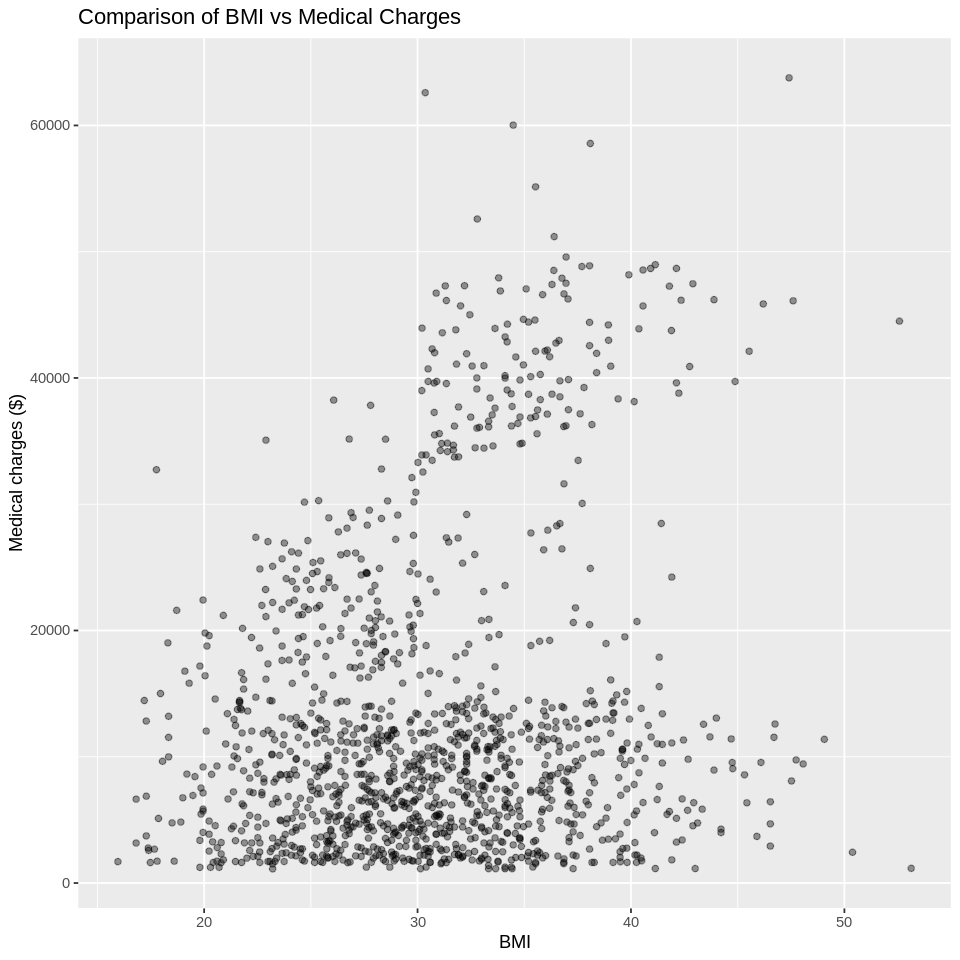

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8) #Remember to set your plot sizes to an appropiate size

bmi_plot <- insurance |>
    ggplot(aes(x = bmi, y =  charges)) + 
        geom_point(alpha = 0.4) + # Deals with the transparency of the points, set it to an appropiate value
        xlab("BMI") +
        ylab("Medical charges ($)") +
        ggtitle("Comparison of BMI vs Medical Charges")


bmi_plot

In [13]:
test_1.5()

Test passed 🌈
Test passed 🎉
Test passed 🌈
Test passed 😸
Test passed 😸
[1] "Success!"


**Question 1.6**
<br> {points: 3}

Analysis: Comment on the effectiveness of the plot. Take into consideration the rules of thumb discussed in lecture. Also comment on what could be improved for this plot and also what is done correctly. 

Answer in the cell below.

1. The visualization has answered the question effectively by displaying an association between BMI and medical charges.
2. Labels are present for axes and the graph title communicates what the intent is.
3. Points are big enough to be read, and transparency allows for a gradient effect to show where points are most concentrated.
4. Data are clearly visible, thanks to transparency as well.
5. Overplotting is generally solved due to setting transparency.
6. Plot area is quite large due to a few outlier points.
7. Title could be centered.
8. Colour could be used in a more engaging way, and circle outlines could be less opaque.


**Question 1.7**
<br> {points: 3}

Analysis: What do you observe from the scatter plot? Do the data suggest that there might be evidence of a relationship between BMI and medical costs of individuals? 
From this plot alone, can we say higher BMI causes higher medical charges? Why or why not? 

Answer in the cell below. 

The data only shows that BMI is not a very strong predictor of medical costs. Higher medical costs are correlated somewhat to higher BMI, moderately weakly, but this does not imply a causal relationship. From this plot alone, cause and effect cannot be inferred.

**Question 1.8**
<br> {points: 3}

Again, based on information from the National Heart, Lung and Blood Institute of the US, smoking cigarettes is said to be a risk factor for obesity. Create the same plot as you did in **Question 1.5** but this time add the `colour` aesthetic to observe if smoking might affect the body mass of individuals. Also, use `labs` to format your legend title. You may want to pass `alpha = 0.4` to the scatter geometric object to make the scatter points translucent (just for your own ease of visualization; you don't have to and we won't check that when grading).

*Assign your answer to an object called `smoke_plot`. Make sure to label your axes appropriately.*

$colour
[1] "Smoker or Non-smoker"

attr(,"class")
[1] "labels"

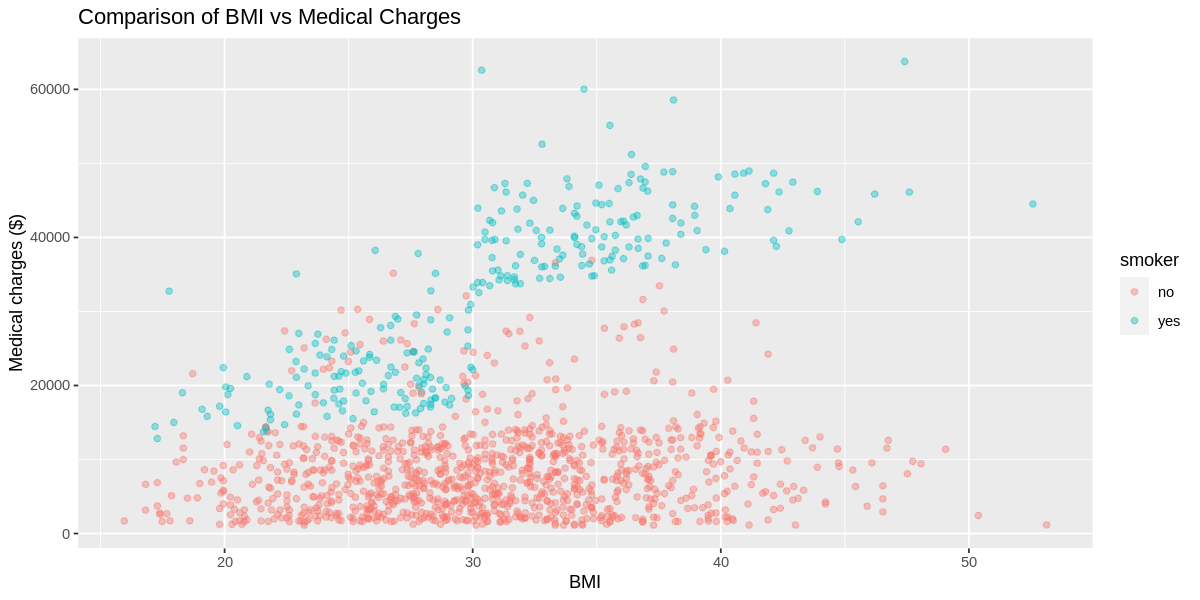

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5) #Remember to set your plot sizes to an appropiate size
smoke_plot <- insurance |>
    ggplot(aes(x = bmi, y = charges, 
               color = smoker)) + 
        geom_point(alpha = 0.4) + # Deals with the transparency of the points, set it to an appropiate value
        xlab("BMI") +
        ylab("Medical charges ($)") +
        ggtitle("Comparison of BMI vs Medical Charges")
        labs(color = "Smoker or Non-smoker")

smoke_plot

In [15]:
# Most of the tests for this question are hidden. You have to decide whether you've created a good visualization!
# here's one test to at least ensure you named the plot object correctly:
expect_true(exists("smoke_plot"))


**Question 1.9.0** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have a lower BMI than non-smokers. 

*Assign your answer to an object called `answer1.9.0`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [16]:
# Replace the fail() with your answer. 

# your code here
answer1.9.0 <- "false"

In [17]:
test_1.9.0()

Test passed 🎊
[1] "Success!"


**Question 1.9.1** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have higher medical charges than non-smokers.

*Assign your answer to an object called `answer1.9.1`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [18]:
# Replace the fail() with your answer. 

# your code here
answer1.9.1 <- "true"

In [19]:
test_1.9.1()

Test passed 😸
[1] "Success!"


**Question 1.10**
<br> {points: 1}

Finally, create a bar graph that displays the proportion of smokers for both females and males in the data set. Use sex as the horizontal axis, and colour the bars to differentiate between smokers / nonsmokers. This could, for example, be used help us determine whether we should consider smoking behaviour when exploring whether there is a relationship between sex and medical costs.

*Assign your answer to an object called `bar_plot`. Make sure to label your axes appropriately.*

>*Note - many historical datasets treated sex as a variable where the possible values are only binary: male or female. This representation in this question reflects how the data were historically collected and is not meant to imply that we believe that sex is binary.*

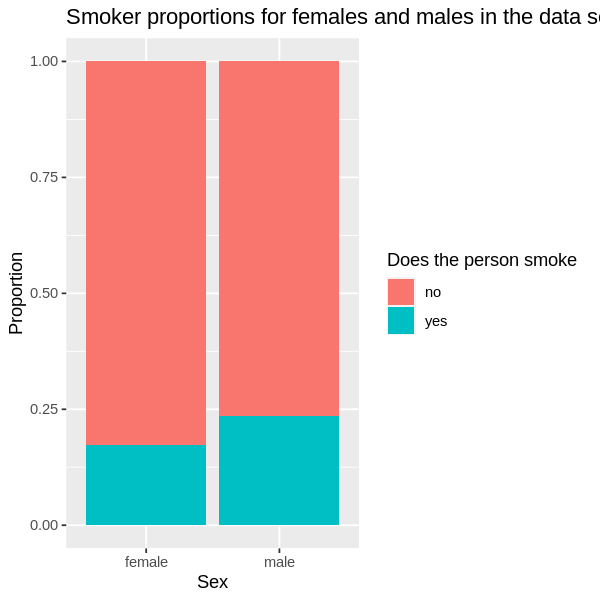

In [20]:
options(repr.plot.width = 5, repr.plot.height = 5) #Remember to set your plot sizes to an appropiate size

bar_plot <- insurance |>
    ggplot(aes(x = sex, fill = smoker)) + 
    geom_bar(position = 'fill') + 
    xlab("Sex") +
    ylab("Proportion") +
    labs(fill = "Does the person smoke") +
    ggtitle("Smoker proportions for females and males in the data set")

bar_plot

In [21]:
test_1.10()

Test passed 🥇
Test passed 🎉
Test passed 🥳
Test passed 🌈
Test passed 😀
Test passed 😸
[1] "Success!"


**Question 1.11**
<br> {points: 1}

Based on the graph, is the proportion of smokers higher amongst men or women?

*Assign your answer to an object called `answer1.11`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"male"` or `"female"`).*

In [22]:
# Replace the fail() with your answer. 

# your code here
answer1.11 <- "male"

In [23]:
test_1.11()

Test passed 😸
[1] "Success!"


## 2. Color Palettes (beyond the defaults)
{points: 1}

In the worksheet and this tutorial, you have seen the same colours again and again. These are from the default `ggplot2` color palette. What if you want different colors? We can do this! In R, one of the libraries that provides altenative color palettes is the `RColorBrewer` library. 

For this question:

1. Load the `RColorBrewer`library
2. Print the list of palettes available for you with the `display.brewer.all()` function (you can also print out a list of color blind friendly palettes with `display.brewer.all(colorblindFriendly = T)`).
3. Use the chart you created in Q1.10 and change the color pallette to your favourite from `RColorBrewer`. Remember that instead of recreating the entire chart from scratch, you can use the `bar_plot` variable you already created and just add the color palette change with the `+` operator (it is also fine if you prefer to copy all the code).
    - For the fill aesthetic with categorical variable the function is: `scale_fill_brewer(palette = '...')`
    - For the fill aesthetic with numeric variable the function is: `scale_fill_distiller(palette = '...')`

You can look more in depth into the documentation of the `scale_fill_*` functions here: https://ggplot2.tidyverse.org/reference/scale_brewer.html.  Optionally, you can also use this [color blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to check if your visualization is color blind friendly


*Assign your answer to an object called `bar_plot_palette`.*

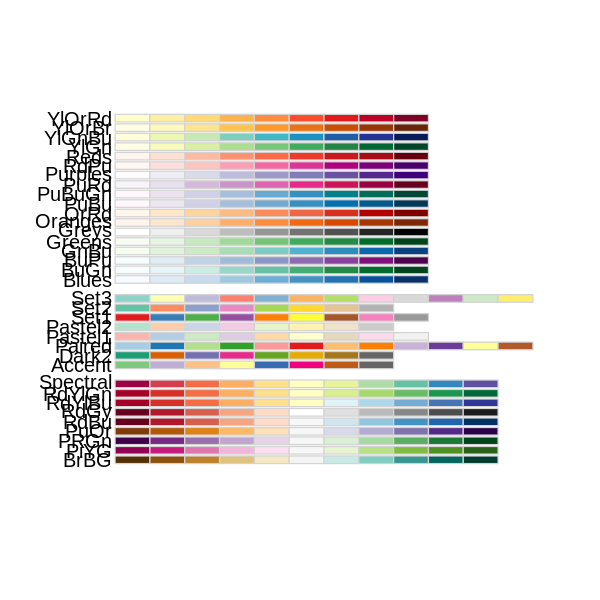

In [24]:
## Run this cell and to explore the RColorBrewer features (step 1 & 2 above)
library(RColorBrewer)
display.brewer.all()

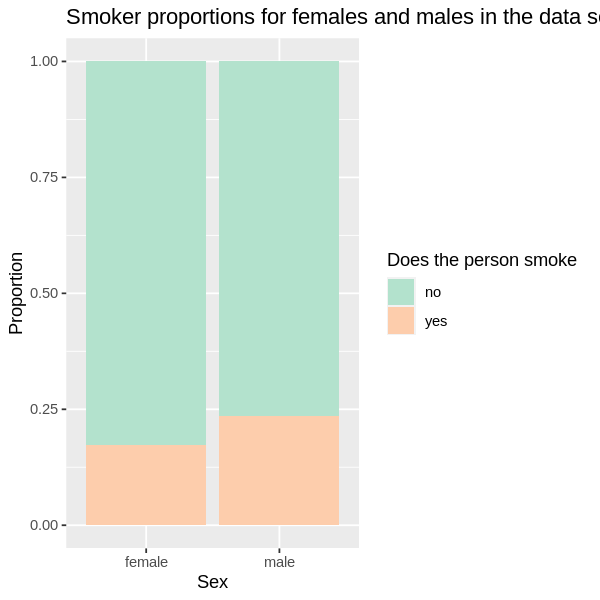

In [25]:
options(repr.plot.width = 5, repr.plot.height = 5) #Remember to set your plot sizes to an appropiate size

bar_plot_palette <- bar_plot +
    scale_fill_brewer(palette = "Pastel2")

bar_plot_palette

In [26]:
test_2()

Test passed 🥳
Test passed 🎊
Test passed 🎊
Test passed 🥇
Test passed 🥳
Test passed 🥇
Test passed 🥳
[1] "Success!"


## 3. Fast-Food Chains in the United States (Continued)
<br> {points: 3}

In `worksheet_viz`, we explored this data set through some visualizations. Now, it is is all up to you. The goal of this assignment is to create **one** plot that can help you figure out which restaurant to open and where! Your goal is the same as in the worksheet: to figure out which fast food chain to open and figure out which state would be the least competitive.

After creating your visualization you need to write a paragraph explaining your visualization and why you chose it. Also, explain your conclusion from the visualization and reasoning as to how you came to that conclusion. You can use properly-cited outside information here to help support your reasoning (but **do not** download and analyze any data from an outside source in this notebook -- our autograder will not be able to see it). Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.

In answering this question, there is no need to restrict yourself to the west coast of the USA. Consider all states that you have data for. You have a variety of graphs to choose from, but before starting the assignment, discuss with a partner which plot would be the most optimal to answer this question.

     "After creating your visualization you need to write a paragraph explaining your visualization and why you chose it. Also, explain your conclusion from the visualization and reasoning as to how you came to that conclusion. If you need to bring in outside information to help you answer your question, please feel free to do so.  Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.\n",

*Note that some restaurant names are spelled incorrectly in data. For the purpose of this exercise you can ignore this and only count the spelling with the most entries for each restaurant.*

<img src="mcdonalds.jpg" width = "600"/>


Hint: The function `pull` from the `dplyr` package selects a column in a data frame and transforms it into a vector. Note: There are different ways you can complete this question so you don't necessarily need to use `pull` (you may find a solution without using it) but it may be helpful.

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


name,st,count
<chr>,<chr>,<int>
McDonald's,TX,144
McDonald's,CA,121
McDonald's,OH,102
⋮,⋮,⋮
Whataburger,TX,73
Burger King,OH,72
McDonald's,KY,71


Joining with `by = join_by(name, st)`
`summarise()` has grouped output by 'st'. You can override using the `.groups`
argument.


st,name,count
<chr>,<chr>,<int>
KY,McDonald's,71
OH,Burger King,72
TX,Whataburger,73
⋮,⋮,⋮
OH,McDonald's,102
CA,McDonald's,121
TX,McDonald's,144


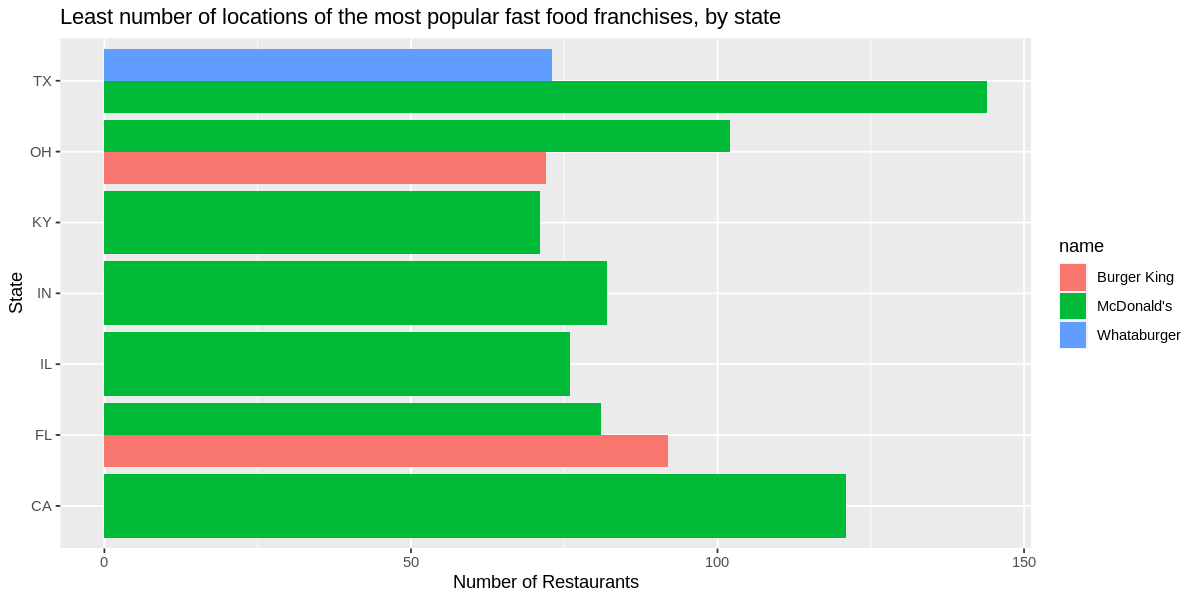

In [51]:
options(repr.plot.width = 10, repr.plot.height = 5) #Remember to set your plot sizes to an appropiate size

fast_food <- read.csv('data/fast_food.csv')
restaurants <- fast_food |>
    filter(st != "Co Spgs") |>
    group_by(name, st) |>
    summarize(count = n()) |>
    arrange(by = desc(count), n = 5) |>
    head(10)
restaurants

states <- fast_food |>
    semi_join(restaurants) |>
    group_by(st, name) |>
    summarize(count = n()) |>
    arrange(by = count, n =5) |>
    tail(10)

states


state_plot <- states |>
    ggplot(aes(x = count, y = st, fill = name)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(fill = "name") +
    xlab("Number of Restaurants") +
    ylab("State") +
    ggtitle("Least number of locations of the most popular fast food franchises, by state")

state_plot


*Write a paragraph explaining your visualization and why you chose it. Also explain your conclusion from the visualization and reasoning as to how you came to that conclusion. You can use properly-cited outside information here to help support your reasoning (but **do not** download and analyze any data from an outside source in this notebook -- our autograder will not be able to see it). Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.*

First, we read the initial dataset, fast_food.csv. Then we can filter out the non-state rows by excluding municipalities - in this case, Co Spgs. Then we can group by restaurant name and state, and summarize/arrange the data so we find the most populous restaurants per state. We save this data frame as "restaurants". We can filter by the top 10 rows to find the overall most popular restaurants. At a glance, we can see that McDonald's, Whataburger, and Burger King are there.

Next we create a second dataframe from fast_food.csv to find states with the least overall number of restaurants. We can combine this with the restaurants dataframe that we just made, and then group by state, name again and arrange again to order the states with the least restaurants. We can take, say, the last 10 rows of this dataframe to get a sense of which states we can plot and visualize.

Then, we can plot the amount of restaurants in these states and color in the bars by the name of the restaurant. From the graph we see that McDonald's is the most popular restaurant, and KY has the least number of McDonald's. That makes it a good choice for us if we wanted to choose just one state that is the least competitive.

In [49]:
source("cleanup.R")